In [2]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('/content/Train_Data.csv', usecols=['customer_reviews','average_review_rating'])

In [15]:
df.head()

,customer_reviews,average_review_rating
0,Item was broken // 3.0 // 2 April 2014 // By\n...,4.5
1,A wonderful collectors piece // 5.0 // 31 Aug....,4.6
2,Great sticker collection // 5.0 // 19 Jun. 201...,4.7
3,Rock and roll cards // 5.0 // 28 July 2013 // ...,5.0
4,Little fingers big imagination // 5.0 // 4 Mar...,4.2


In [16]:
df.sample(5)

,customer_reviews,average_review_rating
821,Great Value for money // 5.0 // 14 Jan. 2015 /...,4.7
5644,Pretty spacer beads // 5.0 // 24 Jun. 2013 // ...,5.0
701,Value for money // 5.0 // 18 Nov. 2014 // By\n...,5.0
4011,Ultra Pro Deck Protectors = Quality // 5.0 // ...,5.0
5646,Three Stars // 3.0 // 23 July 2015 // By\n ...,4.3


In [17]:
df['average_review_rating'].value_counts()

5.0    3870
4.0     999
4.5     538
4.8     425
4.7     389
4.3     299
4.6     282
4.4     234
4.9     173
4.2     159
4.1     106
3.9       3
3.3       2
3.6       2
3.5       2
3.7       2
3.0       1
Name: average_review_rating, dtype: int64

In [18]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-i1f_hwop
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-i1f_hwop
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11754 sha256=9fc5513eec235a1428d0ce2578c867ff4ab665e62aba10df6e6f53aec77ce9db
  Stored in directory: /tmp/pip-ephem-wheel-cache-7jgcca8l/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [19]:
import preprocess_kgptalkie as ps
import re

In [21]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [22]:
df['customer_reviews'] = df['customer_reviews'].apply(lambda x : get_clean(x))

In [23]:
df.head()

,customer_reviews,average_review_rating
0,item was broken 30 2 april 2014 by susie q on ...,4.5
1,a wonderful collectors piece 50 31 aug 2013 by...,4.6
2,great sticker collection 50 19 jun 2011 by f s...,4.7
3,rock and roll cards 50 28 july 2013 by tricia ...,5.0
4,little fingers big imagination 50 4 mar 2014 b...,4.2


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [45]:
tfidf = TfidfVectorizer(max_features = 20000, ngram_range=(1,3), analyzer='char')

In [51]:
X = tfidf.fit_transform(df['customer_reviews'])
y = df['average_review_rating'].astype('int')

In [52]:
X.shape, y.shape

((7486, 15799), (7486,))

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


In [54]:
X_train.shape

(5988, 15799)

In [58]:
clf = LinearSVC( C= 20, class_weight= 'balanced')
clf.fit(X_train, y_train)

LinearSVC(C=20, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [59]:
y_pred = clf.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.93      0.96      0.95       752
           5       0.96      0.93      0.95       743

    accuracy                           0.95      1498
   macro avg       0.63      0.63      0.63      1498
weighted avg       0.94      0.95      0.94      1498



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
x = 'it was good'
x = get_clean(x)
vec = tfidf.transform([x])
clf.predict(vec)

array([5])

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

import re
from nltk.corpus import stopwords

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

import tensorflow as tf

from sklearn.metrics import confusion_matrix

In [67]:
reviews = df['customer_reviews'].copy()
ratings = df['average_review_rating'].copy()

In [68]:
print("Class Distribution:")
print(ratings.value_counts() / len(ratings))

Class Distribution:
5.0    0.516965
4.0    0.133449
4.5    0.071867
4.8    0.056773
4.7    0.051964
4.3    0.039941
4.6    0.037670
4.4    0.031258
4.9    0.023110
4.2    0.021240
4.1    0.014160
3.9    0.000401
3.3    0.000267
3.6    0.000267
3.5    0.000267
3.7    0.000267
3.0    0.000134
Name: average_review_rating, dtype: float64


In [69]:
labels = ratings.apply(lambda x: 1 if x == 5 else 0)

In [70]:
print("Class Distribution:")
print(labels.value_counts() / len(labels))

Class Distribution:
1    0.516965
0    0.483035
Name: average_review_rating, dtype: float64


In [71]:
reviews

0       item was broken 30 2 april 2014 by susie q on ...
1       a wonderful collectors piece 50 31 aug 2013 by...
2       great sticker collection 50 19 jun 2011 by f s...
3       rock and roll cards 50 28 july 2013 by tricia ...
4       little fingers big imagination 50 4 mar 2014 b...
                              ...                        
7481    oxford 176 devon somerset f and r man pump lad...
7482    high quality product exceeded expectations 50 ...
7483    the kids love it 50 23 feb 2014 by milly 99 on...
7484    fun educational 40 14 jan 2013 by happy london...
7485    well well 50 6 july 2015 by elvira wynter on 6...
Name: customer_reviews, Length: 7486, dtype: object

In [73]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [74]:
def process_text(text):
    # Let's remove digits and stop words
    text = re.sub(r'\d+', ' ', text)
    text = text.split()
    text = " ".join([word for word in text if word.lower().strip() not in stop_words])
    return text

In [75]:
reviews = reviews.apply(process_text)

In [76]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)

vocab_length = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(reviews)

max_seq_length = np.max(list(map(lambda x: len(x), sequences)))

sequences = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

In [77]:
sequences

array([[  53,  533,   24, ...,    0,    0,    0],
       [ 449,  596,  226, ...,    0,    0,    0],
       [   1, 1215,  114, ...,    0,    0,    0],
       ...,
       [  68,   30,    8, ...,    0,    0,    0],
       [  19,  397,    3, ...,    0,    0,    0],
       [  10,   10,   22, ...,    0,    0,    0]], dtype=int32)

In [78]:
train_sequences, test_sequences, train_labels, test_labels = train_test_split(sequences, labels, train_size=0.7, random_state=100)

In [79]:
sequences.shape

(7486, 679)

In [80]:
class_weight = dict(
    enumerate(
        class_weight.compute_class_weight(
            class_weight='balanced',
            classes=labels.unique(),
            y=labels
        )
    )
)

class_weight

{0: 1.0351216814159292, 1: 0.9671834625322997}

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 679)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 679, 64)           2575552   
_________________________________________________________________
bidirectional (Bidirectional (None, 679, 512)          494592    
_________________________________________________________________
flatten (Flatten)            (None, 347648)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 347649    
Total params: 3,417,793
Trainable params: 3,417,793
Non-trainable params: 0
_________________________________________________________________
None


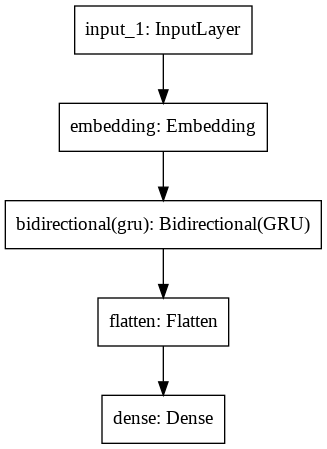

In [81]:
embedding_dim = 64

inputs = tf.keras.Input(shape=(max_seq_length,))

embedding = tf.keras.layers.Embedding(
    input_dim=vocab_length,
    output_dim=embedding_dim,
    input_length=max_seq_length
)(inputs)

gru_layer = tf.keras.layers.Bidirectional(
    tf.keras.layers.GRU(256, return_sequences=True)
)(embedding)

flatten = tf.keras.layers.Flatten()(gru_layer)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(flatten)


model = tf.keras.Model(inputs, outputs)


print(model.summary())
tf.keras.utils.plot_model(model)

In [83]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    train_sequences,
    train_labels,
    validation_split=0.2,
    class_weight=class_weight,
    batch_size=32,
    epochs=2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/2
131/131 [==============================] - 445s 3s/step - loss: 0.5318 - accuracy: 0.8056 - auc: 0.8788 - val_loss: 0.4277 - val_accuracy: 0.8015 - val_auc: 0.9176
Epoch 2/2
131/131 [==============================] - 447s 3s/step - loss: 0.1947 - accuracy: 0.9213 - auc: 0.9770 - val_loss: 0.4219 - val_accuracy: 0.8302 - val_auc: 0.9121


In [85]:
model.evaluate(test_sequences, test_labels)

71/71 [==============================] - 58s 818ms/step - loss: 0.4142 - accuracy: 0.8281 - auc: 0.9114


[0.41424572467803955, 0.8281388878822327, 0.9114325046539307]

In [86]:
y_true = np.array(test_labels, dtype=np.int)
y_pred = np.squeeze(np.array(model.predict(test_sequences) >= 0.5, dtype=np.int))

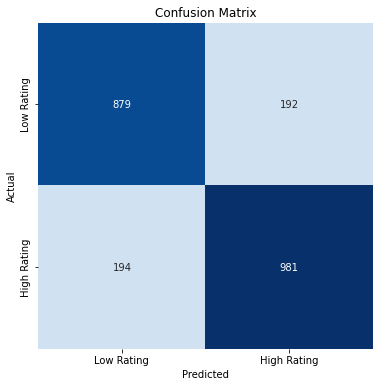

In [87]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)

plt.xlabel("Predicted")
plt.xticks(np.arange(2) + 0.5, ["Low Rating", "High Rating"])

plt.ylabel("Actual")
plt.yticks(np.arange(2) + 0.5, ["Low Rating", "High Rating"])

plt.title("Confusion Matrix")

plt.show()

In [89]:
tf.sparse.reorder

<function tensorflow.python.ops.sparse_ops.sparse_reorder>

In [93]:
test = pd.read_csv('/content/Test_Data.csv', usecols=['customer_reviews'])
test.head()


,customer_reviews
0,Dolls house miniatures // 5.0 // 9 Jan. 2013 /...
1,Tangled // 4.0 // 16 May 2011 // By\n \n ...
2,Okay but that's all // 1.0 // 11 July 2011 // ...
3,Good quality but take down carefully as the fo...
4,hilarious // 5.0 // 11 Dec. 2013 // By\n \n...


In [94]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [95]:
test['customer_reviews'] = test['customer_reviews'].apply(lambda x : get_clean(x))

In [96]:
test.head()

,customer_reviews
0,dolls house miniatures 50 9 jan 2013 by eileen...
1,tangled 40 16 may 2011 by jenna on 16 may 2011...
2,okay but that is all 10 11 july 2011 by h vinc...
3,good quality but take down carefully as the fo...
4,hilarious 50 11 dec 2013 by lauramcv on 11 dec...


In [97]:
tfidf = TfidfVectorizer(max_features = 20000, ngram_range=(1,3), analyzer='char')

In [100]:
X = tfidf.fit_transform(test['customer_reviews'])


In [101]:
X.shape

(2496, 11564)

In [106]:
reviews = test['customer_reviews'].copy()

In [107]:
reviews

0       dolls house miniatures 50 9 jan 2013 by eileen...
1       tangled 40 16 may 2011 by jenna on 16 may 2011...
2       okay but that is all 10 11 july 2011 by h vinc...
3       good quality but take down carefully as the fo...
4       hilarious 50 11 dec 2013 by lauramcv on 11 dec...
                              ...                        
2491    like them but prefer the wooden blocks as i fi...
2492    izzy from jack the neverland pirates 50 10 jul...
2493    five stars 50 4 nov 2015 by amazon customer on...
2494    excellent running engine just had it chipped t...
2495    fancy dress 80s theme everybody thought it loo...
Name: customer_reviews, Length: 2496, dtype: object

In [109]:
def process_text(text):
    # Let's remove digits and stop words
    text = re.sub(r'\d+', ' ', text)
    text = text.split()
    text = " ".join([word for word in text if word.lower().strip() not in stop_words])
    return text

In [111]:
reviews = reviews.apply(process_text)

In [112]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)

vocab_length = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(reviews)

max_seq_length = np.max(list(map(lambda x: len(x), sequences)))

sequences = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

In [113]:
sequences

array([[ 482,  287, 3380, ...,    0,    0,    0],
       [2477,   23, 3382, ...,    0,    0,    0],
       [1042,   24,  398, ...,    0,    0,    0],
       ...,
       [   6,    5,    8, ...,    0,    0,    0],
       [  35,  876,  490, ...,    0,    0,    0],
       [ 674,  342,  696, ...,    0,    0,    0]], dtype=int32)

In [115]:
sequences.shape

(2496, 612)